In [1]:
from setup import cfg
from hydra.utils import instantiate

In [2]:
import numpy as np
import torch
import torchvision.transforms.functional as F
from torchvision.ops import box_convert

from data.cctv_dataset import CCTVDataset
from torchvision.transforms import v2 as T

from utils.transform import SquarePad

In [3]:
dataset = CCTVDataset("../datasets/unclean_cctv/")

In [4]:
loader = iter(dataset)

In [5]:
import matplotlib.pyplot as plt


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

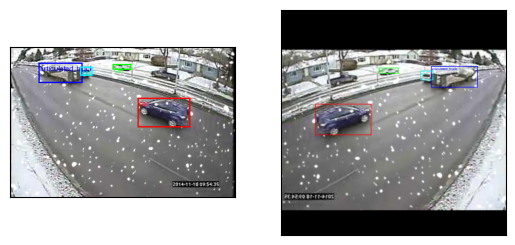

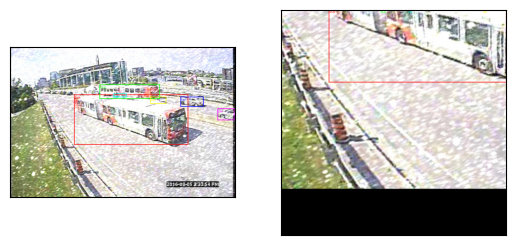

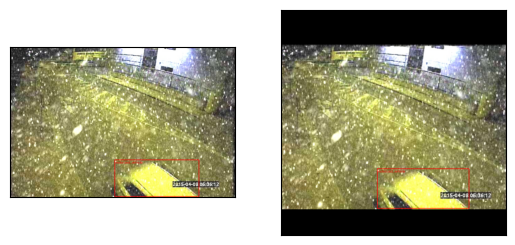

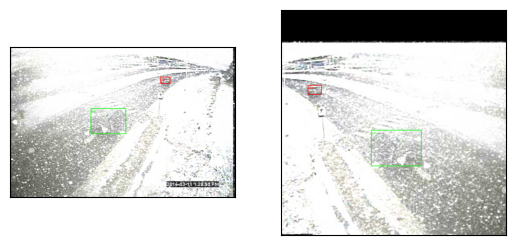

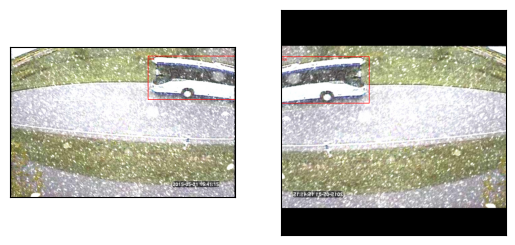

In [6]:
from torchvision.utils import draw_bounding_boxes

colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (0, 255, 255),
    (255, 255, 0),
    (255, 0, 255),
    (80, 70, 180),
    (250, 80, 190),
    (245, 145, 50),
    (70, 150, 250),
    (50, 190, 190),
]

IMAGE_SIZE = 720

transforms = T.Compose(
    [
        SquarePad(),
        T.RandomHorizontalFlip(p=0.5),
        T.RandomResizedCrop(IMAGE_SIZE, (0.2, 1), (1, 1), antialias=True),
    ]
)


def get_sample_img(sample):
    img = sample["image"]
    boxes = sample["boxes"]
    boxes = box_convert(boxes, in_fmt="cxcywh", out_fmt="xyxy")
    drawn_boxes = draw_bounding_boxes(
        img,
        boxes,
        width=2,
        colors=colors[: len(sample["labels"])],
        labels=[dataset.get_category(i) for i in sample["labels"]],
    )
    return drawn_boxes


for i in range(5):
    sample = next(loader)
    transformed = transforms(sample)

    show([get_sample_img(sample), get_sample_img(transformed)])

In [7]:
model =  instantiate(cfg.model)
data = instantiate(cfg.data)

In [8]:
data.setup()
loader = data.train_dataloader()

In [9]:
sample = next(iter(loader))

In [11]:
outputs = model(sample[0])

In [19]:
torch.argmax(outputs["pred_logits"], dim=2)

tensor([[7, 7, 6, 7, 7, 7, 3, 7, 7, 6, 3, 4, 4, 7, 7, 4, 7, 6, 3, 2, 7, 7, 7, 7,
         4, 7, 3, 7, 4, 7, 7, 7, 4, 3, 7, 7, 6, 4, 3, 7, 7, 7, 3, 3, 7, 4, 7, 7,
         3, 7, 4, 4, 6, 7, 7, 6, 7, 7, 7, 4, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 8, 7,
         7, 8, 7, 3, 7, 7, 7, 7, 7, 7, 7, 3, 6, 6, 4, 3, 6, 7, 7, 7, 3, 7, 7, 7,
         7, 7, 6, 7],
        [4, 4, 4, 6, 7, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 6,
         4, 3, 7, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 6,
         3, 3, 8, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 6, 4, 3, 3, 3, 6, 3, 4, 6, 3,
         3, 4, 3, 3, 6, 4, 6, 4, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 6, 3, 3, 3,
         3, 7, 4, 7],
        [3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 7, 3, 3, 3, 3,
         3, 3, 3, 3, 6, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 7, 7, 3, 3,